У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data/yulu_rental.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

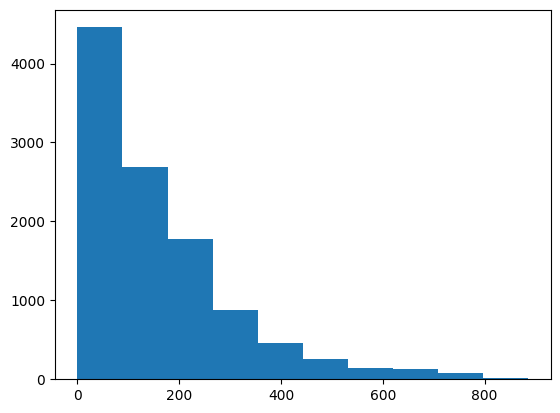

In [10]:
plt.hist(df.registered);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

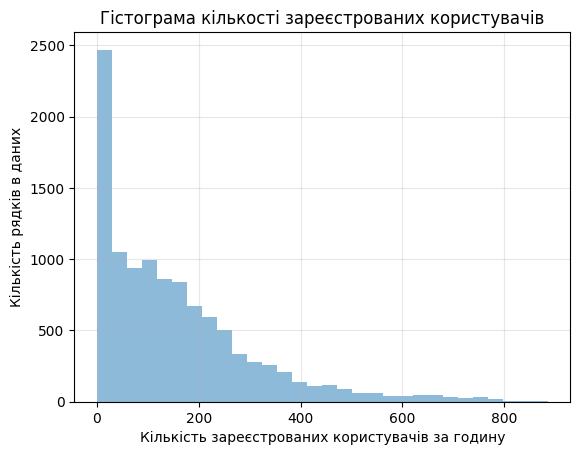

In [13]:
plt.hist(df.registered, bins=30,
         alpha=.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.grid(axis='both', alpha=.3);

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


З гістограми, наведеної вище, ми можемо побачити, що:


*  практично у всіх бінах є дані, переважна кількість даних розподілена у бінах, що відповідають за реєстрацію від о до 400 користувачів на годину;
*  найбільше рядків даних містять інформацію про 20 зареєстрованих користувачів на годину, тобто це найбільш поширена кількість реєстрацій у сервісі за вказаний проміжок часу;
*   даних про понад 800 реєстрацій користувачів на сайті дуже мало, дані про 910-1000 реєстрацій відсутні. Це може свідчити, що така кількість реєстрацій користувачів є нетиповою для цього сервісу і можлива лише, наприклад,  у період якихось великих знижок або зумовлена іншими обставинами.




--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [14]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [15]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [16]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [37]:
groupby_dayofweek = df[df.registered==0].groupby('dayofweek','registered').count()

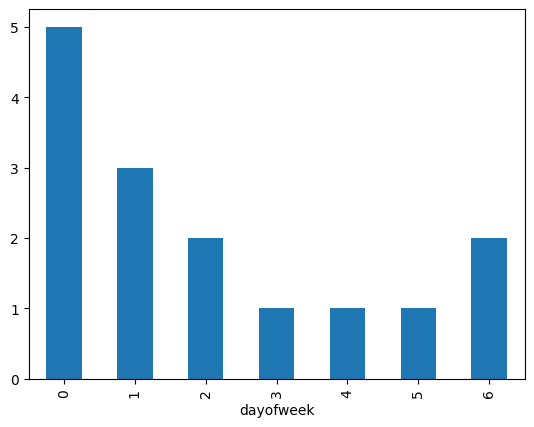

In [50]:
groupby_dayofweek.registered.plot.bar();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [51]:
groupby_weather = df.groupby('weather').registered.count()

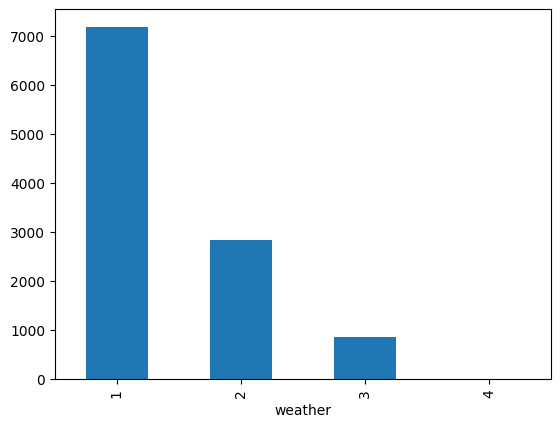

In [52]:
groupby_weather.plot.bar();

Наведені результати цілком логічні, адже чим гірша погода, тим менше користувачів використовують сервіс оренди велосипедів  і відповідно реєструються у ньому. Не думаю, що є сенс окремо досліджувати показник зареєстрованих користувачів відносно погодніх умов. Такий самий результат ми б отримали, якби досліджували загальну кількість користувачів для кожної погодньої умови.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

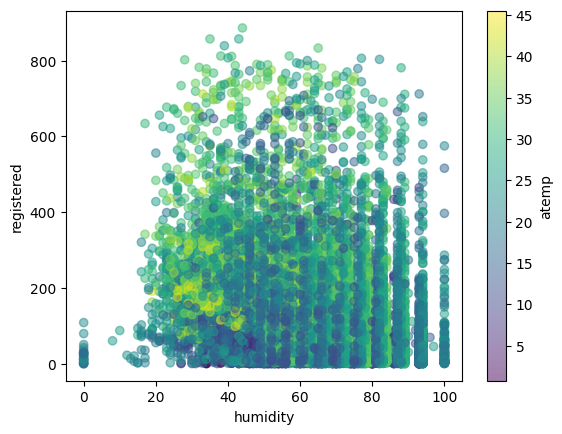

In [60]:
plt.scatter(df.humidity, df.registered, c=df.atemp, alpha=0.5)
plt.xlabel('humidity')
plt.ylabel('registered')
plt.colorbar(label='atemp');

1.   Вологість повітря збільшується разом із зростанням температури повітря. Тому на діаграмі розсіювання ми можемо спостерігати цілком логічний результат, що при зростанні вологості (від 20-ти і вище) кількість зареєстрованих користувачів також зростає, бо це більш сприятливі умови для користування орендою велотранспорту.
2.    Проте на діаграмі ми також бачимо певні викиди даних: при вологості 0, а також 100 кількість зареєстрованих користувачів теж зростає. Це досить дивно, адже за таких показників вологості ми маємо такі температурні показники (або занадто холодно, або занадто спекотно), які не дозволяють насолоджуватися поїздкою на велосипеді.
3. На діаграмі зображено більше фіолетових та синніх точок, що також свідчить про те, що найчастіше клієнти користуються сервісом, коли відчувають, що температура за вікном від 5-ти до 25-ти градусів. Проте за середньої вологості (від 25-ти і вище) клієнти користуються сервісом і реєструються у ньому, не зважаючи на високі температурні показники.



Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)